In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
ds = pd.read_csv('Train.csv')
ds.head()

,ID,country_code,region,age,FQ1,FQ2,FQ3,FQ4,FQ5,FQ6,...,FQ27,FQ28,FQ29,FQ30,FQ31,FQ32,FQ33,FQ34,FQ37,Target
0,ID_000J8GTZ,1,6,35.0,2,NaN,NaN,2,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,1.0,1.0,0,0
1,ID_000QLXZM,32,7,70.0,2,NaN,NaN,2,NaN,NaN,...,NaN,NaN,2.0,NaN,NaN,NaN,1.0,2.0,0,0
2,ID_001728I2,71,7,22.0,2,1.0,NaN,2,NaN,NaN,...,NaN,NaN,2.0,NaN,NaN,NaN,2.0,1.0,1,0
3,ID_001R7IDN,48,3,27.0,1,NaN,NaN,2,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,2.0,1.0,1.0,1,0
4,ID_0029QKF8,25,0,79.0,2,NaN,NaN,2,NaN,NaN,...,NaN,NaN,2.0,NaN,NaN,2.0,1.0,1.0,1,0


In [3]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108446 entries, 0 to 108445
Data columns (total 42 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   ID            108446 non-null  object 
 1   country_code  108446 non-null  int64  
 2   region        108446 non-null  int64  
 3   age           108124 non-null  float64
 4   FQ1           108446 non-null  int64  
 5   FQ2           49124 non-null   float64
 6   FQ3           46218 non-null   float64
 7   FQ4           108446 non-null  int64  
 8   FQ5           21185 non-null   float64
 9   FQ6           60659 non-null   float64
 10  FQ7           60620 non-null   float64
 11  FQ8           108446 non-null  int64  
 12  FQ9           108446 non-null  int64  
 13  FQ10          108446 non-null  int64  
 14  FQ11          83876 non-null   float64
 15  FQ12          108446 non-null  int64  
 16  FQ13          108446 non-null  int64  
 17  FQ14          108446 non-null  int64  
 18  FQ15

In [4]:
ds['age'].isnull().sum()

322

In [5]:
for data in ds.columns:
    if ds[data].isnull().sum() > 50000:
        ds.drop(data, inplace=True, axis=1)

In [6]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108446 entries, 0 to 108445
Data columns (total 31 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   ID            108446 non-null  object 
 1   country_code  108446 non-null  int64  
 2   region        108446 non-null  int64  
 3   age           108124 non-null  float64
 4   FQ1           108446 non-null  int64  
 5   FQ4           108446 non-null  int64  
 6   FQ6           60659 non-null   float64
 7   FQ7           60620 non-null   float64
 8   FQ8           108446 non-null  int64  
 9   FQ9           108446 non-null  int64  
 10  FQ10          108446 non-null  int64  
 11  FQ11          83876 non-null   float64
 12  FQ12          108446 non-null  int64  
 13  FQ13          108446 non-null  int64  
 14  FQ14          108446 non-null  int64  
 15  FQ15          108446 non-null  int64  
 16  FQ16          108446 non-null  int64  
 17  FQ18          108446 non-null  int64  
 18  FQ19

In [7]:
for data in ds.columns:
    if ds[data].dtype == 'int64':
        ds[data] = ds[data].fillna(ds[data].mode())
    elif data == 'age':
        ds[data] = ds[data].fillna(ds[data].mean())
    elif data != 'ID':
        ds[data] = ds[data].fillna(ds[data].median())

In [8]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108446 entries, 0 to 108445
Data columns (total 31 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   ID            108446 non-null  object 
 1   country_code  108446 non-null  int64  
 2   region        108446 non-null  int64  
 3   age           108446 non-null  float64
 4   FQ1           108446 non-null  int64  
 5   FQ4           108446 non-null  int64  
 6   FQ6           108446 non-null  float64
 7   FQ7           108446 non-null  float64
 8   FQ8           108446 non-null  int64  
 9   FQ9           108446 non-null  int64  
 10  FQ10          108446 non-null  int64  
 11  FQ11          108446 non-null  float64
 12  FQ12          108446 non-null  int64  
 13  FQ13          108446 non-null  int64  
 14  FQ14          108446 non-null  int64  
 15  FQ15          108446 non-null  int64  
 16  FQ16          108446 non-null  int64  
 17  FQ18          108446 non-null  int64  
 18  FQ19

In [9]:
ds.drop('ID',axis=1,inplace=True)

In [10]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108446 entries, 0 to 108445
Data columns (total 30 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   country_code  108446 non-null  int64  
 1   region        108446 non-null  int64  
 2   age           108446 non-null  float64
 3   FQ1           108446 non-null  int64  
 4   FQ4           108446 non-null  int64  
 5   FQ6           108446 non-null  float64
 6   FQ7           108446 non-null  float64
 7   FQ8           108446 non-null  int64  
 8   FQ9           108446 non-null  int64  
 9   FQ10          108446 non-null  int64  
 10  FQ11          108446 non-null  float64
 11  FQ12          108446 non-null  int64  
 12  FQ13          108446 non-null  int64  
 13  FQ14          108446 non-null  int64  
 14  FQ15          108446 non-null  int64  
 15  FQ16          108446 non-null  int64  
 16  FQ18          108446 non-null  int64  
 17  FQ19          108446 non-null  float64
 18  FQ20

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(ds.drop('Target',axis=1),ds['Target'],test_size=0.30)

In [12]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

In [13]:
from sklearn.metrics import classification_report,confusion_matrix
import sklearn.metrics
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.73      0.73      0.73     23548
           1       0.28      0.28      0.28      8986

    accuracy                           0.60     32534
   macro avg       0.50      0.50      0.50     32534
weighted avg       0.60      0.60      0.60     32534



In [14]:
error_rate = []
for i in range(1,30):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

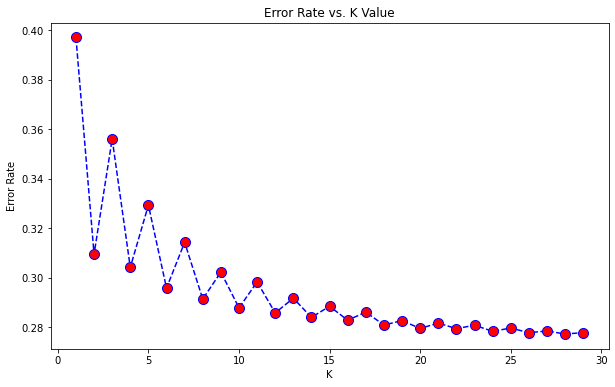

In [15]:
plt.figure(figsize=(10,6))
plt.plot(range(1,30),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
knn1 = KNeighborsClassifier(n_neighbors=25)
knn1.fit(X_train,y_train)
y_pred = knn1.predict(X_test)

print(classification_report(y_test,y_pred))

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
ds['Target'].value_counts()

0    78735
1    29711
Name: Target, dtype: int64

In [19]:
log = LogisticRegression(class_weight={0:0.3,1:0.7})

In [20]:
log.fit(X_train,y_train)

LogisticRegression(class_weight={0: 0.3, 1: 0.7})

In [21]:
pred2 = log.predict(X_test)
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

           0       0.72      1.00      0.84     23548
           1       0.23      0.00      0.01      8986

    accuracy                           0.72     32534
   macro avg       0.48      0.50      0.42     32534
weighted avg       0.59      0.72      0.61     32534



In [22]:
import pickle
pickle.dump(log, open('log_reg.pkl', 'wb'))

In [23]:
from sklearn.tree import DecisionTreeClassifier

In [36]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
predicted = dtree.predict(X_test)
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.72      0.70      0.71     23548
           1       0.28      0.30      0.29      8986

    accuracy                           0.59     32534
   macro avg       0.50      0.50      0.50     32534
weighted avg       0.60      0.59      0.60     32534



In [25]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108446 entries, 0 to 108445
Data columns (total 30 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   country_code  108446 non-null  int64  
 1   region        108446 non-null  int64  
 2   age           108446 non-null  float64
 3   FQ1           108446 non-null  int64  
 4   FQ4           108446 non-null  int64  
 5   FQ6           108446 non-null  float64
 6   FQ7           108446 non-null  float64
 7   FQ8           108446 non-null  int64  
 8   FQ9           108446 non-null  int64  
 9   FQ10          108446 non-null  int64  
 10  FQ11          108446 non-null  float64
 11  FQ12          108446 non-null  int64  
 12  FQ13          108446 non-null  int64  
 13  FQ14          108446 non-null  int64  
 14  FQ15          108446 non-null  int64  
 15  FQ16          108446 non-null  int64  
 16  FQ18          108446 non-null  int64  
 17  FQ19          108446 non-null  float64
 18  FQ20

In [27]:
import sklearn.model_selection as ms
inside = ms.KFold(n_splits=10, shuffle = True)
outside = ms.KFold(n_splits=10, shuffle = True)

In [34]:
dtree= DecisionTreeClassifier(class_weight = {0:0.40, 1:0.60})
param_grid = [{"max_depth": [2,4,8,16,32], "min_samples_leaf": [3,4,5,6,7]}]

clf = ms.GridSearchCV(estimator = dtree, param_grid = param_grid, 
                      cv = inside, # Use the inside folds
                      scoring = 'recall',
                      return_train_score = True)

clf.fit(ds.drop('Target',axis=1), ds['Target'])
print(clf.best_estimator_.max_depth)
print(clf.best_estimator_.min_samples_leaf)

KeyboardInterrupt: 

In [33]:
dtree = DecisionTreeClassifier(class_weight = ({0:0.40 , 1:0.60}),max_depth=2,min_samples_leaf=3)
dtree.fit(X_train,y_train)
pred1 = dtree.predict(X_test)
print(classification_report(y_test,pred1))

              precision    recall  f1-score   support

           0       0.72      1.00      0.84     23548
           1       0.00      0.00      0.00      8986

    accuracy                           0.72     32534
   macro avg       0.36      0.50      0.42     32534
weighted avg       0.52      0.72      0.61     32534



C:\Users\jjj\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [37]:
pd.DataFrame({'feature' :ds.drop('Target',axis=1).columns ,'importance' : dtree.feature_importances_}).sort_values(by=['importance'],ascending=False).head(10)

,feature,importance
0,country_code,0.210253
2,age,0.140036
1,region,0.069075
17,FQ19,0.052006
16,FQ18,0.031653
21,FQ23,0.030750
3,FQ1,0.030458
8,FQ9,0.029075
4,FQ4,0.026309
9,FQ10,0.026166


In [40]:
X = ds[['country_code','age','region','FQ19','FQ18','FQ23','FQ1','FQ9','FQ4','FQ10']]
y = ds['Target']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30)

In [58]:
tree= DecisionTreeClassifier(max_depth=25,min_samples_leaf=3)
tree.fit(X_train,y_train)
predicted = tree.predict(X_test)
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.72      0.79      0.76     23635
           1       0.27      0.20      0.23      8899

    accuracy                           0.63     32534
   macro avg       0.50      0.50      0.49     32534
weighted avg       0.60      0.63      0.61     32534



In [59]:
import pickle
pickle.dump(tree, open('mod.pkl','wb'))

In [60]:
ds['country_code'].nunique()

144

In [61]:
ds['age'].nunique()

86

In [68]:
ds['FQ19'].value_counts()

2.0    65477
1.0    20626
3.0    15211
4.0     3447
5.0     1908
6.0     1197
7.0      384
8.0      196
Name: FQ19, dtype: int64

In [67]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108446 entries, 0 to 108445
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   country_code  108446 non-null  int64  
 1   age           108446 non-null  float64
 2   region        108446 non-null  int64  
 3   FQ19          108446 non-null  float64
 4   FQ18          108446 non-null  int64  
 5   FQ23          108446 non-null  int64  
 6   FQ1           108446 non-null  int64  
 7   FQ9           108446 non-null  int64  
 8   FQ4           108446 non-null  int64  
 9   FQ10          108446 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 8.3 MB


In [74]:
for x in X.columns:
    print(f'{x} : {X[x].value_counts().head(10)}')

country_code : 45     3588
33     2491
1      2065
51     1441
32     1155
53     1107
11     1094
113     787
104     774
108     751
Name: country_code, dtype: int64
age : 30.0    3669
25.0    3115
40.0    2977
35.0    2770
20.0    2640
28.0    2635
32.0    2513
50.0    2477
22.0    2430
45.0    2420
Name: age, dtype: int64
region :  0    24548
 4    21710
 2    16136
 6    11585
 1     9938
 3     9620
 7     8097
 5     6097
-1      715
Name: region, dtype: int64
FQ19 : 2.0    65477
1.0    20626
3.0    15211
4.0     3447
5.0     1908
6.0     1197
7.0      384
8.0      196
Name: FQ19, dtype: int64
FQ18 : 1    61133
2    43753
3     3026
4      534
Name: FQ18, dtype: int64
FQ23 : 2    68976
1    38559
3      566
4      345
Name: FQ23, dtype: int64
FQ1 : 2    58373
1    48896
3      817
4      360
Name: FQ1, dtype: int64
FQ9 : 2    83683
1    23514
3      748
4      501
Name: FQ9, dtype: int64
FQ4 : 2    85788
1    21053
3     1176
4      429
Name: FQ4, dtype: int64
FQ10 : 2    80882


In [75]:
X['FQ23'].value_counts()

2    68976
1    38559
3      566
4      345
Name: FQ23, dtype: int64